In [75]:
import numpy as np
from numpy import *
import scipy.io
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import struct

%matplotlib inline  

In [154]:
file = open('../../../out/zeroOT_5000.out','rb')



file.seek(0,2)
eof = file.tell()
file.seek(0,0)

name = file.read(79)
nit = fromfile(file,dtype=int32,count=1)
t = fromfile(file,dtype=float64,count=1)
ndim=fromfile(file,dtype=int32,count=1)
neqpar=fromfile(file,dtype=int32,count=1)
nw=fromfile(file,dtype=int32,count=1)
#ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]
ndata = fromfile(file,dtype=int32,count=2)
varbuf = fromfile(file,dtype=float,count=6)[:6]
varnames = file.read(79)

#typedef enum vars {rho, mom1, mom2, energy, b1, b2,energyb,rhob,b1b,b2b} CEV;
datcount=(nw+ndim)*ndata[0]*ndata[1]
#alldat=fromfile(file,dtype=float,count=datcount)[:(nw+ndim)*ndata[0]*ndata[1]]
alldat=fromfile(file,dtype=float,count=786432)
if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]:
    alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1])
#alldat=np.reshape(alldat,(nw+ndim,ndata[0],ndata[1],),'C')
alldat=np.reshape(alldat,(12,256,256),'C')

file.close()

In [155]:
print(ndata[0])

256


In [156]:
print ('varnames:',varnames)
print ('nit:',nit)
print ('name:',name)
print ('t:',t)
print ('ndim:',ndim)
print ('neqpar:',neqpar)
print ('nw:',nw)
print ('varbuf:',varbuf)

varnames: b'x y rho mx my e bx by  gamma eta g1 g2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
nit: [5000]
name: b'test1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
t: [0.5001]
ndim: [2]
neqpar: [6]
nw: [10]
varbuf: [1.66666667 0.         0.         0.         0.         0.        ]


In [157]:
dens=alldat[2,:,:]
print(np.min(dens))
print(np.max(dens))

0.09497021361102023
0.41910286577224914


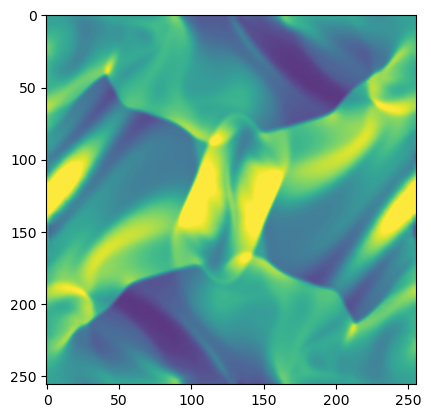

In [158]:
im2 = plt.imshow(dens, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=0.07,vmax=0.352)

plt.show()

In [29]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = alldat[0,:,:]
Y = alldat[1,:,:]


dens = alldat[2,:,:]
#bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
#bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, dens, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

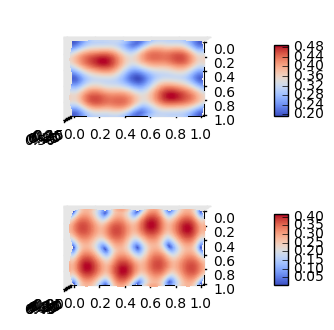

In [12]:
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(2, 1, 1,projection='3d')

#X = alldat[0,:,:]
#Y = alldat[1,:,:]


energy = alldat[5,:,:]
bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, energy, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)



ax = fig.add_subplot(2, 1, 2,projection='3d')
surf = ax.plot_surface(X, Y, bmag, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()